In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import re


import statsmodels.api as sm

In [ ]:
sns.set(style="darkgrid")
df = pd.read_excel('/content/drive/MyDrive/Salary_Data.xlsx')
display(df)

,age,gender,education_level,job_title,years_of_experience,salary,date,emotional_satisfaction
0,32,Male,Bachelor's,Software Engineer,5.0,90000,01.01.2015,3.000000
1,28,Female,Master's,Data Analyst,3.0,65000,01.01.2015,1.500000
2,45,Male,PhD,Senior Manager,15.0,150000,01.01.2015,7.500000
3,36,Female,Bachelor's,Sales Associate,7.0,60000,01.01.2015,1.000000
4,52,Male,Master's,Director,20.0,200000,01.02.2015,10.000000
...,...,...,...,...,...,...,...,...
368,35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000,01.09.2022,2.666667
369,43,Male,Master's,Director of Operations,19.0,170000,01.09.2022,8.500000
370,29,Female,Bachelor's,Junior Project Manager,2.0,40000,01.10.2022,-1.000000
371,34,Male,Bachelor's,Senior Operations Coordinator,7.0,90000,01.10.2022,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     373 non-null    int64  
 1   gender                  373 non-null    object 
 2   education_level         373 non-null    object 
 3   job_title               373 non-null    object 
 4   years_of_experience     373 non-null    float64
 5   salary                  373 non-null    int64  
 6   date                    373 non-null    object 
 7   emotional_satisfaction  373 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 23.4+ KB


In [ ]:
print("Кількість рядків, що повторяється", df[df.duplicated()].shape)

Кількість рядків, що повторяється (0, 8)


In [ ]:
df = df.drop_duplicates()


In [ ]:
print("Кількість рядків з нульовими значенями", df[df.isnull()].shape)

Кількість рядків з нульовими значенями (373, 8)


In [ ]:
a = df['salary']

mean = np.mean(a)
median = np.median(a)
mode = stats.mode(a)
varience = np.var(a)
std_deviation = np.std(a)

print(f"Середнє: {mean:.2f}")
print(f"Мода: {mode}")
print(f"Дисперсія: {varience:.2f}")
print(f"Стандартне відхилення: {std_deviation:.2f}")



Середнє: 100577.35
Мода: ModeResult(mode=40000, count=31)
Дисперсія: 2320860029.68
Стандартне відхилення: 48175.31


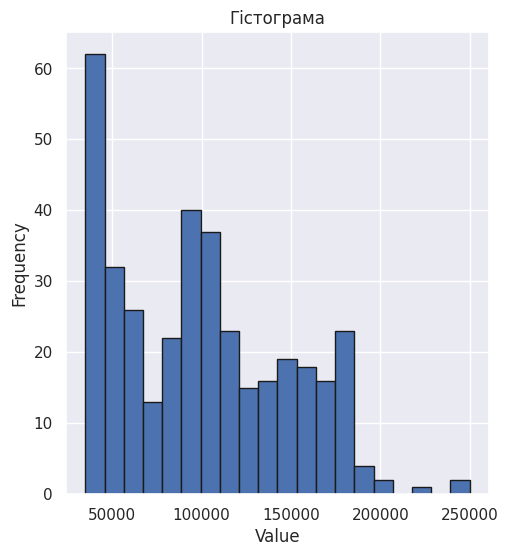

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(a[a > 30000], bins=20, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Гістограма')

plt.show()


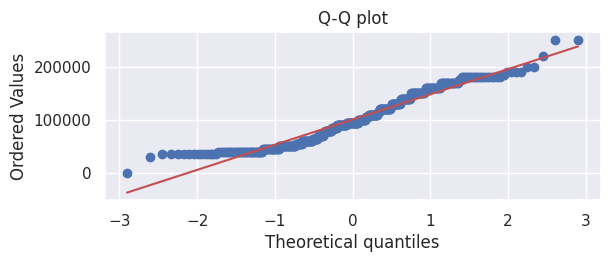

In [ ]:
plt.subplot(2, 1, 2)
stats.probplot(a, dist="norm", plot=plt)
plt.title('Q-Q plot')

plt.show()

In [ ]:
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

print("Кореляція Пірсона:")
print(pearson_corr,'\n')
print("Кореляція Спірмена:")
print(spearman_corr, '\n')
print("Кореляція Кендала:")
print(kendall_corr,'\n')

Кореляція Пірсона:
                             age  years_of_experience    salary  \
age                     1.000000             0.979128  0.922335   
years_of_experience     0.979128             1.000000  0.930338   
salary                  0.922335             0.930338  1.000000   
emotional_satisfaction  0.943603             0.947632  0.983140   

                        emotional_satisfaction  
age                                   0.943603  
years_of_experience                   0.947632  
salary                                0.983140  
emotional_satisfaction                1.000000   

Кореляція Спірмена:
                             age  years_of_experience    salary  \
age                     1.000000             0.982991  0.932182   
years_of_experience     0.982991             1.000000  0.940523   
salary                  0.932182             0.940523  1.000000   
emotional_satisfaction  0.949116             0.959038  0.993357   

                        emotional_satisfac

<ipython-input-35-ee6bbee5a49e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df.corr(method='pearson')
<ipython-input-35-ee6bbee5a49e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')
<ipython-input-35-ee6bbee5a49e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kendall_corr = df.corr(method='kendall')


<ipython-input-36-f9a1610ed147>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


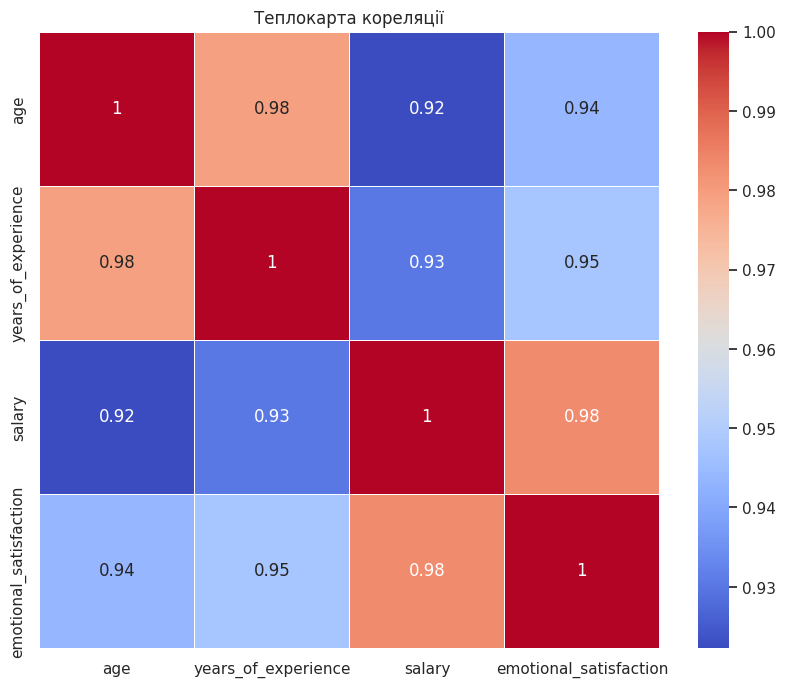

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', linewidths=0.5)
plt.title('Теплокарта кореляції')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження даних
# df = pd.read_csv("Salary Data.csv")  # Переконайтеся, що ви завантажили ваш датасет
# Вибірка ознак та цільової змінної
columns_to_drop = ["age", "years_of_experience", "emotional_satisfaction", "gender", "job_title", "education_level","date"]
X = df.drop(columns=columns_to_drop, axis=1)  # Ознаки (всі стовпці, крім вищезазначених)
y = df["salary"]  # Цільова змінна (salary)


# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Створення та навчання моделі Випадковий ліс
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнози для тестового набору
y_pred = rf_model.predict(X_test)

# Оцінка якості прогнозу
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("За ансамблевим методом (випадкового лісу): ")
print(f"Середньоквадратична похибка (MSE): {mse}")
print(f"Коефіцієнт детермінації (R^2): {r2}")



За ансамблевим методом (випадкового лісу): 
Середньоквадратична похибка (MSE): 17483887.959866222
Коефіцієнт детермінації (R^2): 0.9923350588695992


In [ ]:
columns_to_drop = ["age", "years_of_experience", "emotional_satisfaction", "gender", "job_title", "education_level","date"]
X_m = df.drop(columns=columns_to_drop, axis=1)  # Ознаки (всі стовпці, крім вищезазначених)
y_m = df["salary"]  # Цільова змінна (salary)

X_train_sm_m = sm.add_constant(X_m)
lr_m = sm.OLS(y_m, X_train_sm_m).fit()

lr_m.params

print(lr_m.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.219e+31
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:24:49   Log-Likelihood:                 7966.0
No. Observations:                 373   AIC:                        -1.593e+04
Df Residuals:                     371   BIC:                        -1.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.677e-11   1.54e-11      3.678      0.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження даних
# df = pd.read_csv("Salary Data.csv")  # Переконайтеся, що ви завантажили ваш датасет

# Вибірка ознак та цільової змінної
columns_to_drop = ["age", "years_of_experience", "emotional_satisfaction", "gender", "job_title", "education_level", "date"]
X = df.drop(columns=columns_to_drop, axis=1)  # Ознаки (всі стовпці, крім вищезазначених)
y = df["salary"]  # Цільова змінна (salary)

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення поліноміальних ознак
poly = PolynomialFeatures(degree=2)  # Задайте бажаний ступінь полінома (у цьому випадку 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Побудова поліноміальної регресії
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Прогнози для тестового набору
y_pred_poly = poly_model.predict(X_test_poly)

# Оцінка якості прогнозу
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Середньоквадратична похибка (MSE) для поліноміальної регресії: {mse_poly}")
print(f"Коефіцієнт детермінації (R^2) для поліноміальної регресії: {r2_poly}")


Середньоквадратична похибка (MSE) для поліноміальної регресії: 2.6442851325950753e-12
Коефіцієнт детермінації (R^2) для поліноміальної регресії: 1.0


In [ ]:
import pandas as pd

# Завантаження даних та встановлення індексу на дати

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [ ]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [ ]:
import statsmodels.api as sm

p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 8  # Наприклад, щомісячна сезонність


In [ ]:
model = sm.tsa.SARIMAX(train_data['salary'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


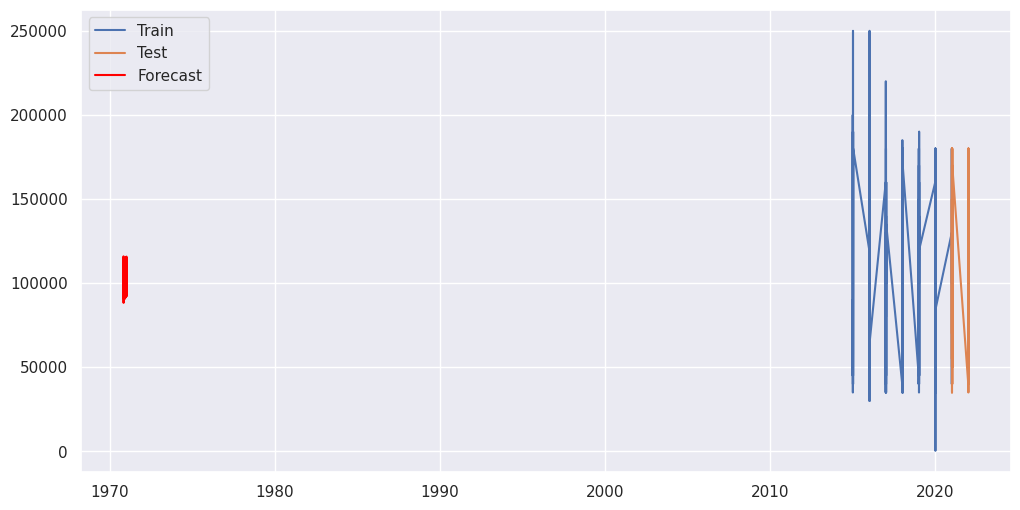

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['salary'], label='Train')
plt.plot(test_data.index, test_data['salary'], label='Test')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.legend()
plt.show()
